# Titanic - Exploratory data analysis (trial 2)

<b>Problem</b>: find correlations between different attributes and code up an algorithm that accurately predicts the surviving passengers</br>
<b>Solution</b>: working on it (should apply different regression models and machine learning algorithms)


<b>Output: </b> a csv file with two columns: 'PassengerId' and 'survived'


In [119]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [120]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')


# Function inventory (last updated: 5/30/2024)




In [121]:
"""plot_entropy function: brought to you by chatgpt"""

def plot_entropy(data):
    try:
        # Step 1: Ensure data is a numpy array
        data = np.array(data)
        print("Data:", data)
        
        # Step 2: Calculate probabilities
        values, counts = np.unique(data, return_counts=True)
        probabilities = counts / len(data)
        print("Probabilities:", probabilities)
        
        # Step 3: Calculate entropy
        entropy = -np.sum(probabilities * np.log2(probabilities))
        print("Entropy:", entropy)
        
        # Step 4: Plotting entropy
        plt.figure(figsize=(10, 6))
        plt.bar(values, probabilities, color='skyblue')
        plt.xlabel('Values')
        plt.ylabel('Probabilities')
        plt.title(f'Entropy: {entropy:.4f}')
        plt.show()
    
    except Exception as e:
        print("An error occurred:", e)


# some surface level analyses and graphs



In [122]:
train_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/train (1).csv')
test_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/test.csv')
train_df = pd.concat([train_data,test_data],axis = 0).reset_index(drop = False)
# print(train_data['PassengerId'].count())
train_data.info()
print(train_data['Survived'].isnull().sum())
# train_data.drop(['Name','Embarked'],axis = 1)
# plot_entropy(train_data['Age'])
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
0
index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Em

In [123]:
median_age_by_pclass = train_data.groupby('Pclass')['Age'].median()
# print(median_age_by_pclass)

def fill_age(row):
    if pd.isnull(row['Age']):
        return median_age_by_pclass[row['Pclass']]
    else:
        return row['Age']
    
train_data['Age'] = train_data.apply(fill_age, axis=1)


In [124]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [125]:
print(test_data)

     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jon

In [126]:
print(train_df.isnull().sum())

null_indices = train_df[train_df['Survived'].isna()].index
for index in null_indices:
    print(index)

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1

# logistic regression



In [127]:
# Convert categorical variables to numerical (example using one-hot encoding)
categorical_cols = ['Sex', 'Embarked']  # Replace with your categorical columns
data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

# Define features and target
X = data.drop('Survived', axis=1)  # Replace 'Survived' with your target column
y = data['Survived']

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [129]:

X = train_data['Age']
print(X)
y = train_data['Survived']
model = LogisticRegression()
rfe = RFE(8)
# rfe = RFE.fit(X, y)
# # summarize the selection of the attributes
# print('Selected features: %s' % list(X.columns[rfe.support_]))



0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
5      24.00
6      54.00
7       2.00
8      27.00
9      14.00
10      4.00
11     58.00
12     20.00
13     39.00
14     14.00
15     55.00
16      2.00
17     29.00
18     31.00
19     24.00
20     35.00
21     34.00
22     15.00
23     28.00
24      8.00
25     38.00
26     24.00
27     19.00
28     24.00
29     24.00
30     40.00
31     37.00
32     24.00
33     66.00
34     28.00
35     42.00
36     24.00
37     21.00
38     18.00
39     14.00
40     40.00
41     27.00
42     24.00
43      3.00
44     19.00
45     24.00
46     24.00
47     24.00
48     24.00
49     18.00
50      7.00
51     21.00
52     49.00
53     29.00
54     65.00
55     37.00
56     21.00
57     28.50
58      5.00
59     11.00
60     22.00
61     38.00
62     45.00
63      4.00
64     37.00
65     24.00
66     29.00
67     19.00
68     17.00
69     26.00
70     32.00
71     16.00
72     21.00
73     26.00
74     32.00
75     25.00
76     24.00

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split the dataset into training and test sets
print(X_train)


331    45.50
733    23.00
382    32.00
704    26.00
813     6.00
118    24.00
536    45.00
361    29.00
29     24.00
55     37.00
865    42.00
595    36.00
239    33.00
721    17.00
81     29.00
259    50.00
486    35.00
716    38.00
800    34.00
781    17.00
542    11.00
326    61.00
534    30.00
535     7.00
483    63.00
762    20.00
533    24.00
713    29.00
390    36.00
495    24.00
482    50.00
377    27.00
365    30.00
412    33.00
468    24.00
409    24.00
7       2.00
580    25.00
155    51.00
880    25.00
425    24.00
101    24.00
199    24.00
424    18.00
298    37.00
884    25.00
247    24.00
478    22.00
305     0.92
316    24.00
2      26.00
405    34.00
742    21.00
260    24.00
367    24.00
158    24.00
554    22.00
829    62.00
677    18.00
380    42.00
626    57.00
302    19.00
432    42.00
522    24.00
404    20.00
843    34.50
355    28.00
464    24.00
753    23.00
212    22.00
449    52.00
79     30.00
148    36.50
428    24.00
60     22.00
660    50.00
804    27.00

In [131]:
# Identify numeric and categorical columns
numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']  # Add other numeric features if necessary
categorical_features = ['Sex_male', 'Embarked_Q', 'Pclass']  # Add other categorical features if necessary

# Define preprocessor for numeric features (impute missing values and scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessor for categorical features (impute missing values and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the logistic regression model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [132]:
# model.fit(X_train, y_train)


In [133]:
train_data['Deck'] = train_data['Cabin'].str.slice(0,1)
deck_distribution = train_data['Deck'].value_counts(dropna = False)
clean_distribution = train_data['Deck'].value_counts(dropna = True)

print(train_data.groupby('Deck')['Fare'].median())
# correlation_coefficient3 = train_data['Deck'].corr(train_data['Pclass'])
# print(train_data.groupby('Survived')['Age'].median())

print(train_data.groupby('Deck')['Pclass'].value_counts()) #Cabin C had the most 1st class passengers 

train_data['title'] = train_data.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False) #title deck

#print(train_data['Fare'].min()) # there are zero values in the dataset
#print((train_data.Fare == 0).sum()) # 17 zero values 
train_data.Fare = train_data.Fare.replace(0,np.NaN) # replace 0 with NaN
# print((train_data.Fare == 0).sum())

#now fill in the Fare column
train_data['Fare_clean'] = train_data.Fare.dropna()
#print(train_data['Fare_clean'])
correlation_coefficient3 = train_data['Fare_clean'].corr(train_data['Pclass']) #correlation_coefficient3 = -0.5694
median_fare_by_pclass = train_data.groupby('Pclass')['Fare'].median()
print(median_fare_by_pclass)


Deck
A    35.50000
B    80.00000
C    83.47500
D    53.10000
E    45.18125
F    13.00000
G    13.58125
T    35.50000
Name: Fare, dtype: float64
Deck  Pclass
A     1         15
B     1         47
C     1         59
D     1         29
      2          4
E     1         25
      2          4
      3          3
F     2          8
      3          5
G     3          4
T     1          1
Name: count, dtype: int64
Pclass
1    61.9792
2    15.0229
3     8.0500
Name: Fare, dtype: float64


In [134]:
def fill_fare(row):
    if pd.isnull(row['Fare']):
        return median_fare_by_pclass[row['Pclass']]
    else:
        return row['Fare']
    
train_data['Fare'] = train_data.apply(fill_fare, axis=1)
# fare_distribution = train_data['Fare'].value_counts(dropna = False)



In [135]:
# deck column
# train_data = train_data.dropna(subset=['Deck', 'Pclass'])

# Group by Cabin and calculate the distribution of Pclass
# cabin_pclass_distribution = train_data.groupby('Pclass')['Deck'].value_counts(normalize=True).unstack()

# Plot the distribution
# plt.figure(figsize=(12, 6))
# sns.heatmap(cabin_pclass_distribution, annot = True)
# plt.title('Distribution of Deck for each Pclass')
# plt.xlabel('Deck')
# plt.ylabel('Pclass')
# plt.show()

In [136]:
train_data['Deck'] = train_data.groupby('Pclass')['Deck'].transform(lambda x: x.fillna(x.mode().loc[0])) # used chatgpt
# print(sum(train_data['Deck'].isnull())) --> validated the results (the 'Deck' column is now filled)

In [137]:
print(train_data['Survived'].isnull().sum()) # missing 418 values in the 'Survived' column

0


In [138]:
sex_encoded = pd.get_dummies(train_data['Sex'], prefix='sex')

# Concatenate the original DataFrame with the new one-hot encoded variable
df_encoded = pd.concat([train_data, sex_encoded], axis=1)


        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
Deck  Survived
A     0             8
      1             7
B     1            35
      0            12
C     1            54
      0            45
D     1            25
      0             8
E     1            24
      0             8
F     0           465
      1           195
G     0             2
      1             2
T     0             1
Name: count, dtype: int64


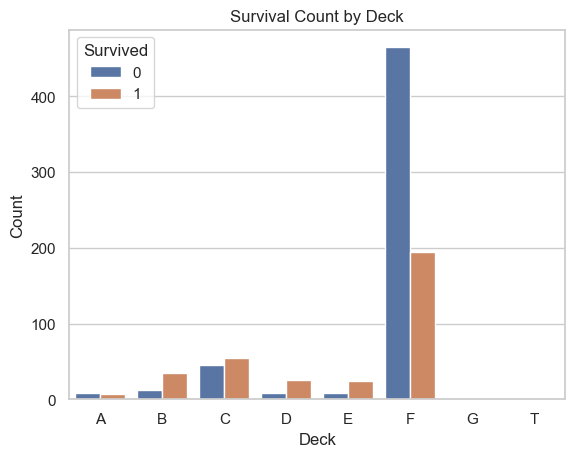

In [139]:
print(train_data[['Pclass','Survived']].groupby('Pclass').mean()) 
corr = train_data['Pclass'].corr(train_data['Survived']) # corr = -0.338
corr2 = train_data['Age'].corr(train_data['Survived']) # corr2 = -0.077 
corr3 = train_data['Fare'].corr(train_data['Survived']) # corr3 = 0.25
corr_sex_survived = df_encoded[['sex_male', 'sex_female']].corrwith(df_encoded['Survived']) #asked chatgpt and got sex_male = -0.54, sex_female = 0.54
print(train_data.groupby('Deck')['Survived'].value_counts())
# sns.barplot(train_data.groupby('Deck')['Survived']) 
# plt.show()

grouped_counts = train_data.groupby(['Deck', 'Survived']).size().reset_index(name='Count')

# Plot the grouped counts using seaborn #asked my good friend ChatGpt
sns.barplot(x='Deck', y='Count', hue='Survived', data=grouped_counts)
plt.title('Survival Count by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.show()

In [140]:
# Deck F passengers mostly died, more females survived than males, 1st class passengers mostly survived --> will use these correlations to fill out the 'survived' column
sum =0
count_f = (train_data['Deck'] == "F").sum()

# Check if 'Deck' is "F" and 'Survived' is NaN
condition_met = (train_data['Deck'] == "F") & (train_data['Survived'].isna())

for index, row in train_data.iterrows():
    # Check if 'Deck' is "F" and 'Survived' is NaN for the current passenger 
    if row['Deck'] == "F" and pd.isna(row['Survived']) and row['Sex'] == "female":
        # If the condition is met, update 'Survived' to 1 for the current passenger
        train_data.at[index, 'Survived'] = 1

    if row['Sex'] == 'male' and row['Age'] < 40:
        train_data.at[index, 'Survived'] = 0 



In [141]:
for index, row in train_data.iterrows():
    # Check if 'Pclass' is 1 and 'Survived' is NaN for the current passenger 
    if pd.isna(row['Survived']) and row['Pclass'] == 1:
        # If the condition is met, update 'Survived' to 1 for the current passenger
        train_data.at[index, 'Survived'] = 1

# print(train_data['Survived'])
# print(train_data['Survived'].isnull().sum()) --> have three more cells to fill in

for index, row in train_data.iterrows():
    if pd.isna(row['Survived']):
        print(index,row)
        print()



In [142]:
import requests
import pandas as pd

# print(train_data['Survived'].isnull().sum()) - three passengers don't meet some but not all of the conditions listed above (shall deal with them on a case by case basis)
for index, row in train_data.iterrows():
    if "Sandstrom" in row['Name']: #Passenger Beatrice Irene Sandstrom -  mom and sister survived
        # print(row['Name'],row['PassengerId'])
        train_data.at[index, 'Survived'] = 1
    
        print(row['Name'],row['Survived'])
    
    if "Malachard" in row['Name']: #Noel Malachard: no siblings or spouse, 2nd class passenger, male, 29 y/o --> probably didn't survive
        # print(row['Name'],row['Survived'])
        train_data.at[index, 'Survived'] = 0

        print(row['Name'],row['Survived'])
    
    if "Nourney" in row['Name']: # Alfred Nourney: no siblings or spouse, 2nd class passenger, male, 20 y/o, cabin D  
        # print(row['Name'],row['Survived'])
        train_data.at[index, 'Survived'] = 0

        print(row['Name'],row['Survived'])
    

print(train_data['Survived'].isnull().sum())

# print(train_data['PassengerId'],train_data['Survived'])

survivors = pd.DataFrame({'PassengerId': train_data.PassengerId, 'Survived': train_data.Survived})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(survivors)
print(train_data.Survived.isnull().sum())
survivors.to_csv('survivors_final.csv', index = False)

Sandstrom, Miss. Marguerite Rut 1
Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson) 1
0
     PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
5              6         0
6              7         0
7              8         0
8              9         1
9             10         1
10            11         1
11            12         1
12            13         0
13            14         0
14            15         0
15            16         1
16            17         0
17            18         0
18            19         0
19            20         1
20            21         0
21            22         0
22            23         1
23            24         0
24            25         0
25            26         1
26            27         0
27            28         0
28            29         1
29            30         0
30            31         0
31            32         1
32            33   

# DECISION TREE - iris dataset (chatgpt)



In [143]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_iris  # Example dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [144]:
iris = load_iris()
X = iris.data
y = iris.target

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [147]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [199]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [201]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [202]:
def plot_decision_tree(model, feature_names, class_names):
    # plot_tree function contains a list of all nodes and leaves of the Decision tree
    tree = plot_tree(model, feature_names = feature_names, class_names = class_names,
                     rounded = True, proportion = True, precision = 2, filled = True, fontsize=10)
    
    # I return the tree for the next part
    return tree

In [203]:
def plot_decision_path_tree(model, X, class_names=None):
    fig = plt.figure(figsize=(10, 10))
    class_names = model.classes_.astype(str) if type(class_names) == type(None) else class_names
    feature_names = X.index if type(X) == type(pd.Series()) else X.columns
    
    # Getting the tree from the function programmed above
    tree = plot_decision_tree(model, feature_names, class_names)
    
    # Get the decision path of the wanted prediction 
    decision_path = model.decision_path([X])

    # Now remember the tree object contains all nodes and leaves so the logic here
    # is to loop into the tree and change visible attribute for components that 
    # are not in the decision path
    for i in range(0,len(tree)):
        if i not in decision_path.indices:
            plt.setp(tree[i],visible=False)

    plt.show()

['setosa', 'versicolor', 'virginica']


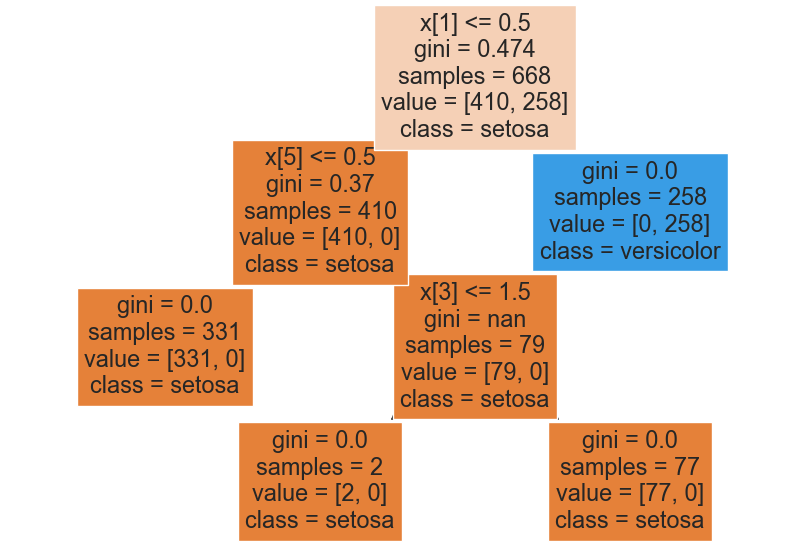

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2.0


In [205]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create and train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
class_names_list = iris.target_names.tolist()
print(class_names_list)
# Visualize the decision tree
plt.figure(figsize=(10, 7))
plot_tree(clf, filled=True, class_names=class_names_list)
plt.show()
display(iris_df.iloc[100,:].to_frame().T)
# plot_decision_path_tree(model, iris_df.iloc[100,:-1], class_names=iris.target_names)

# DECISION TREE - titanic dataset


In [239]:
# load datasets
X = data.drop(['Survived','PassengerId','Name','Ticket','Cabin'], axis=1)  # Replace 'Survived' with your target column
y = data['Survived']

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

     Pclass    Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  Embarked_S
331       1  45.50      0      0   28.5000      True       False        True
733       2  23.00      0      0   13.0000      True       False        True
382       3  32.00      0      0    7.9250      True       False        True
704       3  26.00      1      0    7.8542      True       False        True
813       3   6.00      4      2   31.2750     False       False        True
118       1  24.00      0      1  247.5208      True       False       False
536       1  45.00      0      0   26.5500      True       False        True
361       2  29.00      1      0   27.7208      True       False       False
29        3  24.00      0      0    7.8958      True       False        True
55        1  37.00      0      0   35.5000      True       False        True
865       2  42.00      0      0   13.0000     False       False        True
595       3  36.00      1      1   24.1500      True       False        True

In [241]:
import numpy as np

# X_single_feature = X_train['Age'].reshape(-1, 1)

# # Example: Reshape data with a single sample
# X_single_sample = X_train.reshape(1, -1)


In [242]:
clf = DecisionTreeClassifier(random_state=42)
# clf.fit(X_train['Fare'], y_train)

In [243]:
from sklearn import tree
import graphviz
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)

In [249]:
cols=["Age", "Fare","Pclass"] 

train_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/train (1).csv')
test_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/test.csv')
X_DT=train_data[cols]
Y_DT=train_data['Survived']
X2= test_data[cols]
# Y_d = test_data['Survived']
tree1.fit(X_DT, Y_DT)
# tree1.predict(X_DT)

print(X_DT)
newList = list(tree1.predict(X_DT))
newList2 = list(Y_DT)
# print(newList)
false_neg = 0
false_pos = 0
for i in range(len(newList)):
    if newList[i] != newList2[i]:
        if newList[i] == 0:
            false_neg+=1
        elif newList[i] == 1:
            false_pos+=1
new_matrix = confusion_matrix(Y_DT, tree1.predict(X_DT))
print(new_matrix)
# print(Y_DT)
print(f"there are {false_neg} false negatives and {false_pos} false positives")

print(f"total predictions: {len(newList)}")

       Age      Fare  Pclass
0    22.00    7.2500       3
1    38.00   71.2833       1
2    26.00    7.9250       3
3    35.00   53.1000       1
4    35.00    8.0500       3
5      NaN    8.4583       3
6    54.00   51.8625       1
7     2.00   21.0750       3
8    27.00   11.1333       3
9    14.00   30.0708       2
10    4.00   16.7000       3
11   58.00   26.5500       1
12   20.00    8.0500       3
13   39.00   31.2750       3
14   14.00    7.8542       3
15   55.00   16.0000       2
16    2.00   29.1250       3
17     NaN   13.0000       2
18   31.00   18.0000       3
19     NaN    7.2250       3
20   35.00   26.0000       2
21   34.00   13.0000       2
22   15.00    8.0292       3
23   28.00   35.5000       1
24    8.00   21.0750       3
25   38.00   31.3875       3
26     NaN    7.2250       3
27   19.00  263.0000       1
28     NaN    7.8792       3
29     NaN    7.8958       3
30   40.00   27.7208       1
31     NaN  146.5208       1
32     NaN    7.7500       3
33   66.00   1

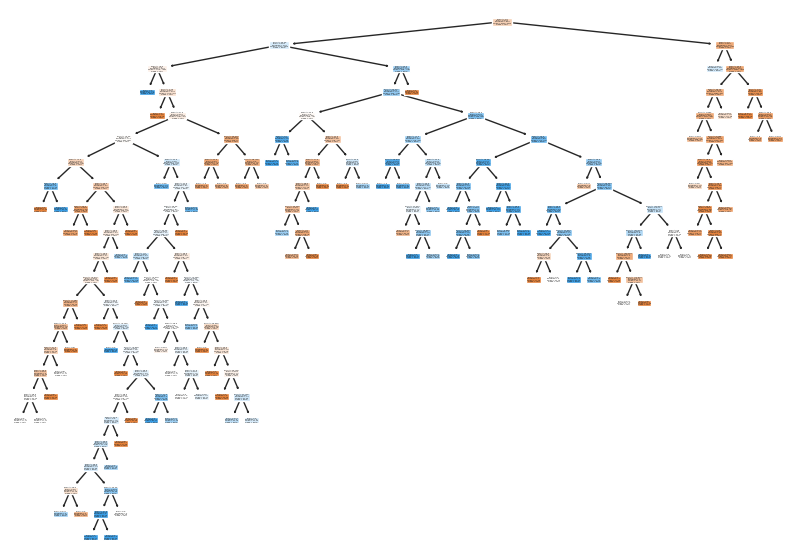

In [250]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create and train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_DT, Y_DT)
class_names_list = ['Age','Fare','Pclass']
from sklearn import tree
# clftree = tree.DecisionTreeClassifier(max_depth=3)
# clftree.fit(X_DT,Y_DT)
# clftree.predict(X_DT)

# Visualize the decision tree
plt.figure(figsize=(10, 7))
plot_tree(clf, filled=True, class_names=class_names_list)
# print(class_names_list)
plt.show()

In [164]:
y = pd.DataFrame(data=train_data, columns=train_data.columns)
# y['target'] = iris.target
X_d = train_data.drop(['Name','Ticket','Sex','Cabin','Embarked'], axis=1)  # Replace 'Survived' with your target column
y_d = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, random_state=0)
print(X_train)
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)
clf2.predict(X_train)


     PassengerId  Survived  Pclass    Age  SibSp  Parch      Fare
105          106         0       3  28.00      0      0    7.8958
68            69         1       3  17.00      4      2    7.9250
253          254         0       3  30.00      1      0   16.1000
320          321         0       3  22.00      0      0    7.2500
706          707         1       2  45.00      0      0   13.5000
271          272         1       3  25.00      0      0    0.0000
424          425         0       3  18.00      1      1   20.2125
752          753         0       3  33.00      0      0    9.5000
615          616         1       2  24.00      1      2   65.0000
2              3         1       3  26.00      0      0    7.9250
882          883         0       3  22.00      0      0   10.5167
467          468         0       1  56.00      0      0   26.5500
403          404         0       3  28.00      1      0   15.8500
258          259         1       1  35.00      0      0  512.3292
720       

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [253]:
feature_names = train_df.index if type(train_df) == type(pd.Series()) else train_df.columns
# print(feature_names)
feature_list = []
for item in feature_names:
    if item not in ['index','PassengerId','Pclass','Name','Ticket','Survived']:
        feature_list.append(item)
print(feature_list)

['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']


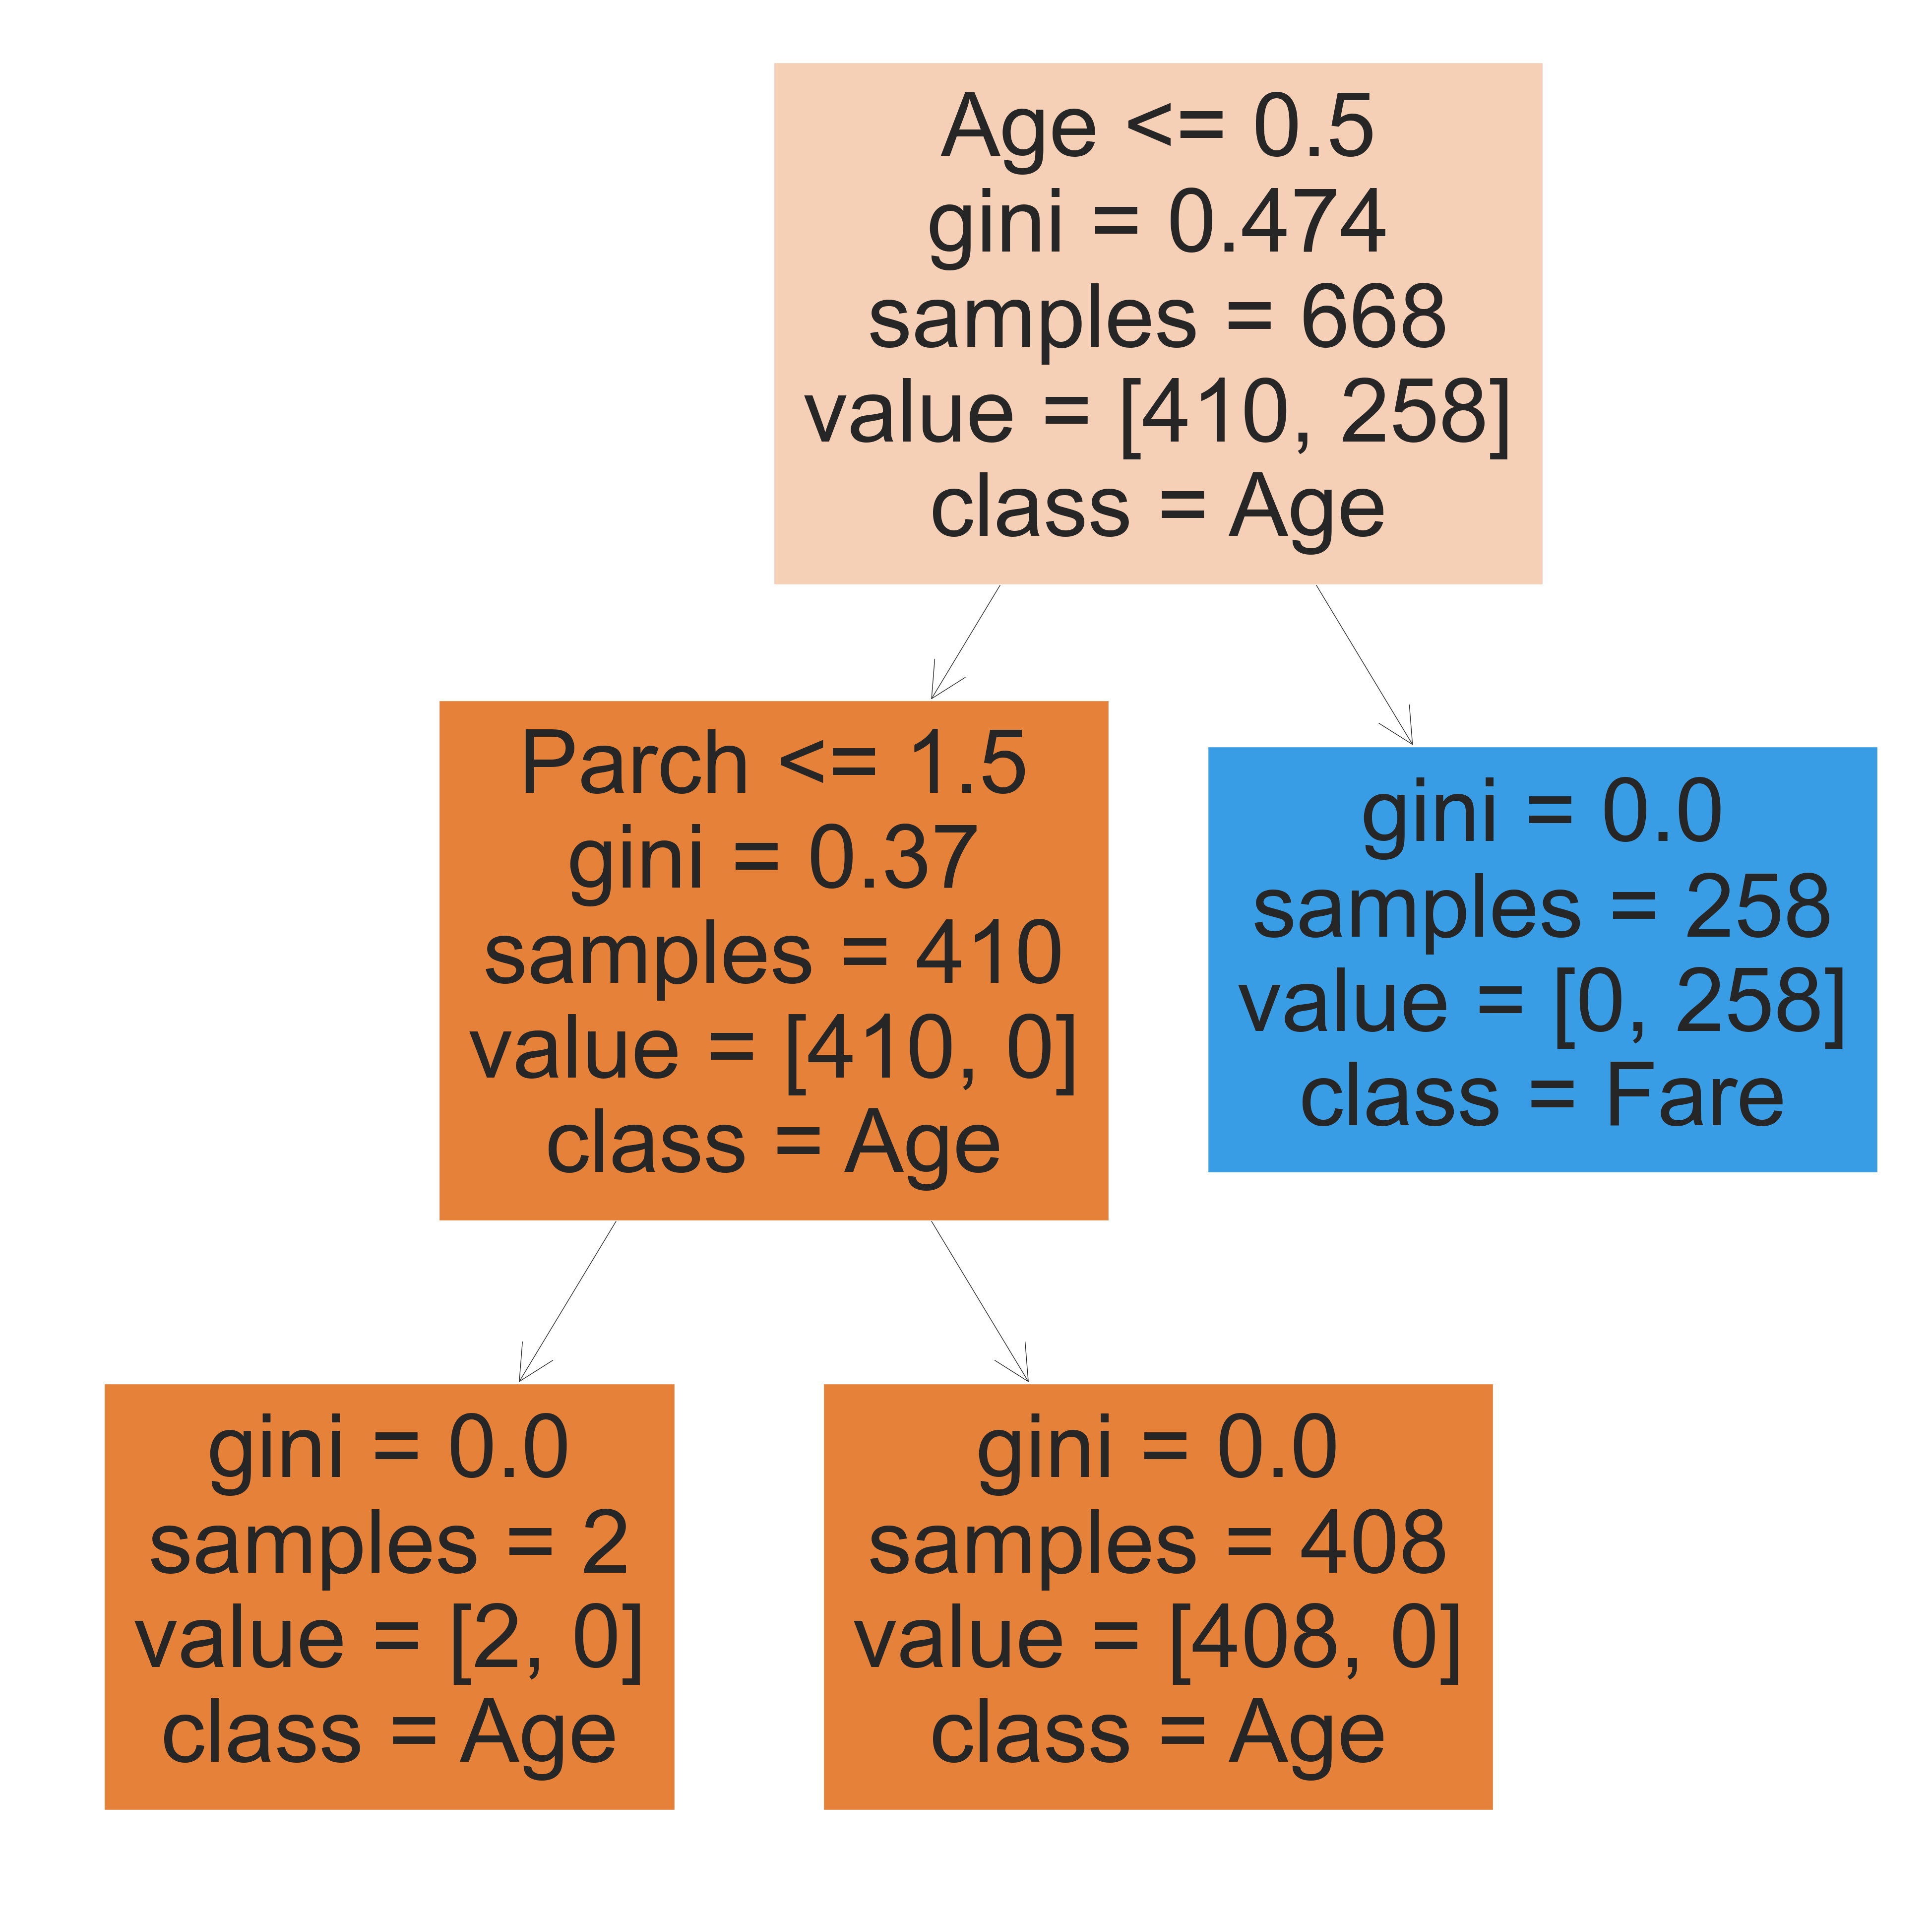

In [259]:
plt.figure(figsize=(50, 50))
class_list = ['Age','Fare','Parch','Sibsp']
plot_tree(clf2, filled=True,class_names=class_list,feature_names = feature_list)
# print(class_list)
# print(class_names_list)
plt.show()

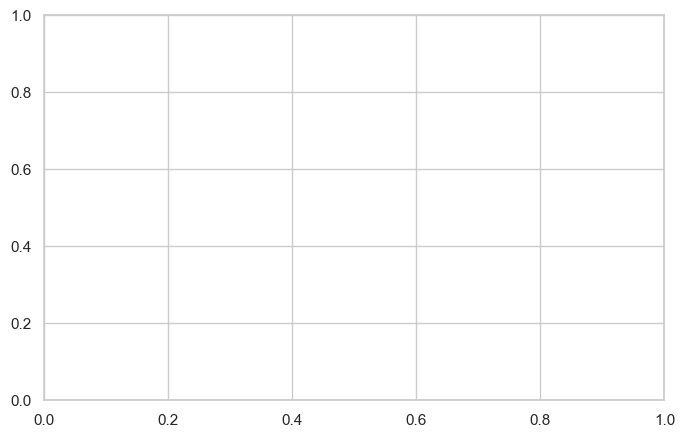

In [174]:
import matplotlib
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import re
import matplotlib

fig, ax = plt.subplots(figsize=(8,5))


In [172]:
def replace_text(obj):
    if type(obj) == matplotlib.text.Annotation:
        txt = obj.get_text()
        txt = re.sub("\nsamples[^$]*class","\nclass",txt)
        obj.set_text(txt)
    return obj
    
ax.properties()['children'] = [replace_text(i) for i in ax.properties()['children']]
fig.show()

In [158]:
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini


In [159]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [221]:
train_df_len = 881
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
X_train.drop(labels = 'Name',axis = 1)
X_train.drop(labels = "Ticket", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))
print(X_train)

X_train 590
X_test 291
y_train 590
y_test 291
test 428
     index  PassengerId  Pclass  \
234    234          235       2   
220    220          221       3   
836    836          837       3   
691    691          692       3   
132    132          133       3   
440    440          441       2   
312    312          313       2   
497    497          498       3   
41      41           42       2   
539    539          540       1   
108    108          109       3   
720    720          721       2   
56      56           57       2   
467    467          468       1   
383    383          384       1   
479    479          480       3   
24      24           25       3   
809    809          810       1   
703    703          704       3   
596    596          597       2   
51      51           52       3   
444    444          445       3   
807    807          808       3   
855    855          856       3   
264    264          265       3   
595    595          596       3   


In [230]:
logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# print(X_train)
# print(y_train)
# acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
# acc_log_test = round(logreg.score(X_test,y_test)*100,2)
# print("Training Accuracy: % {}".format(acc_log_train))
# print("Testing Accuracy: % {}".format(acc_log_test))

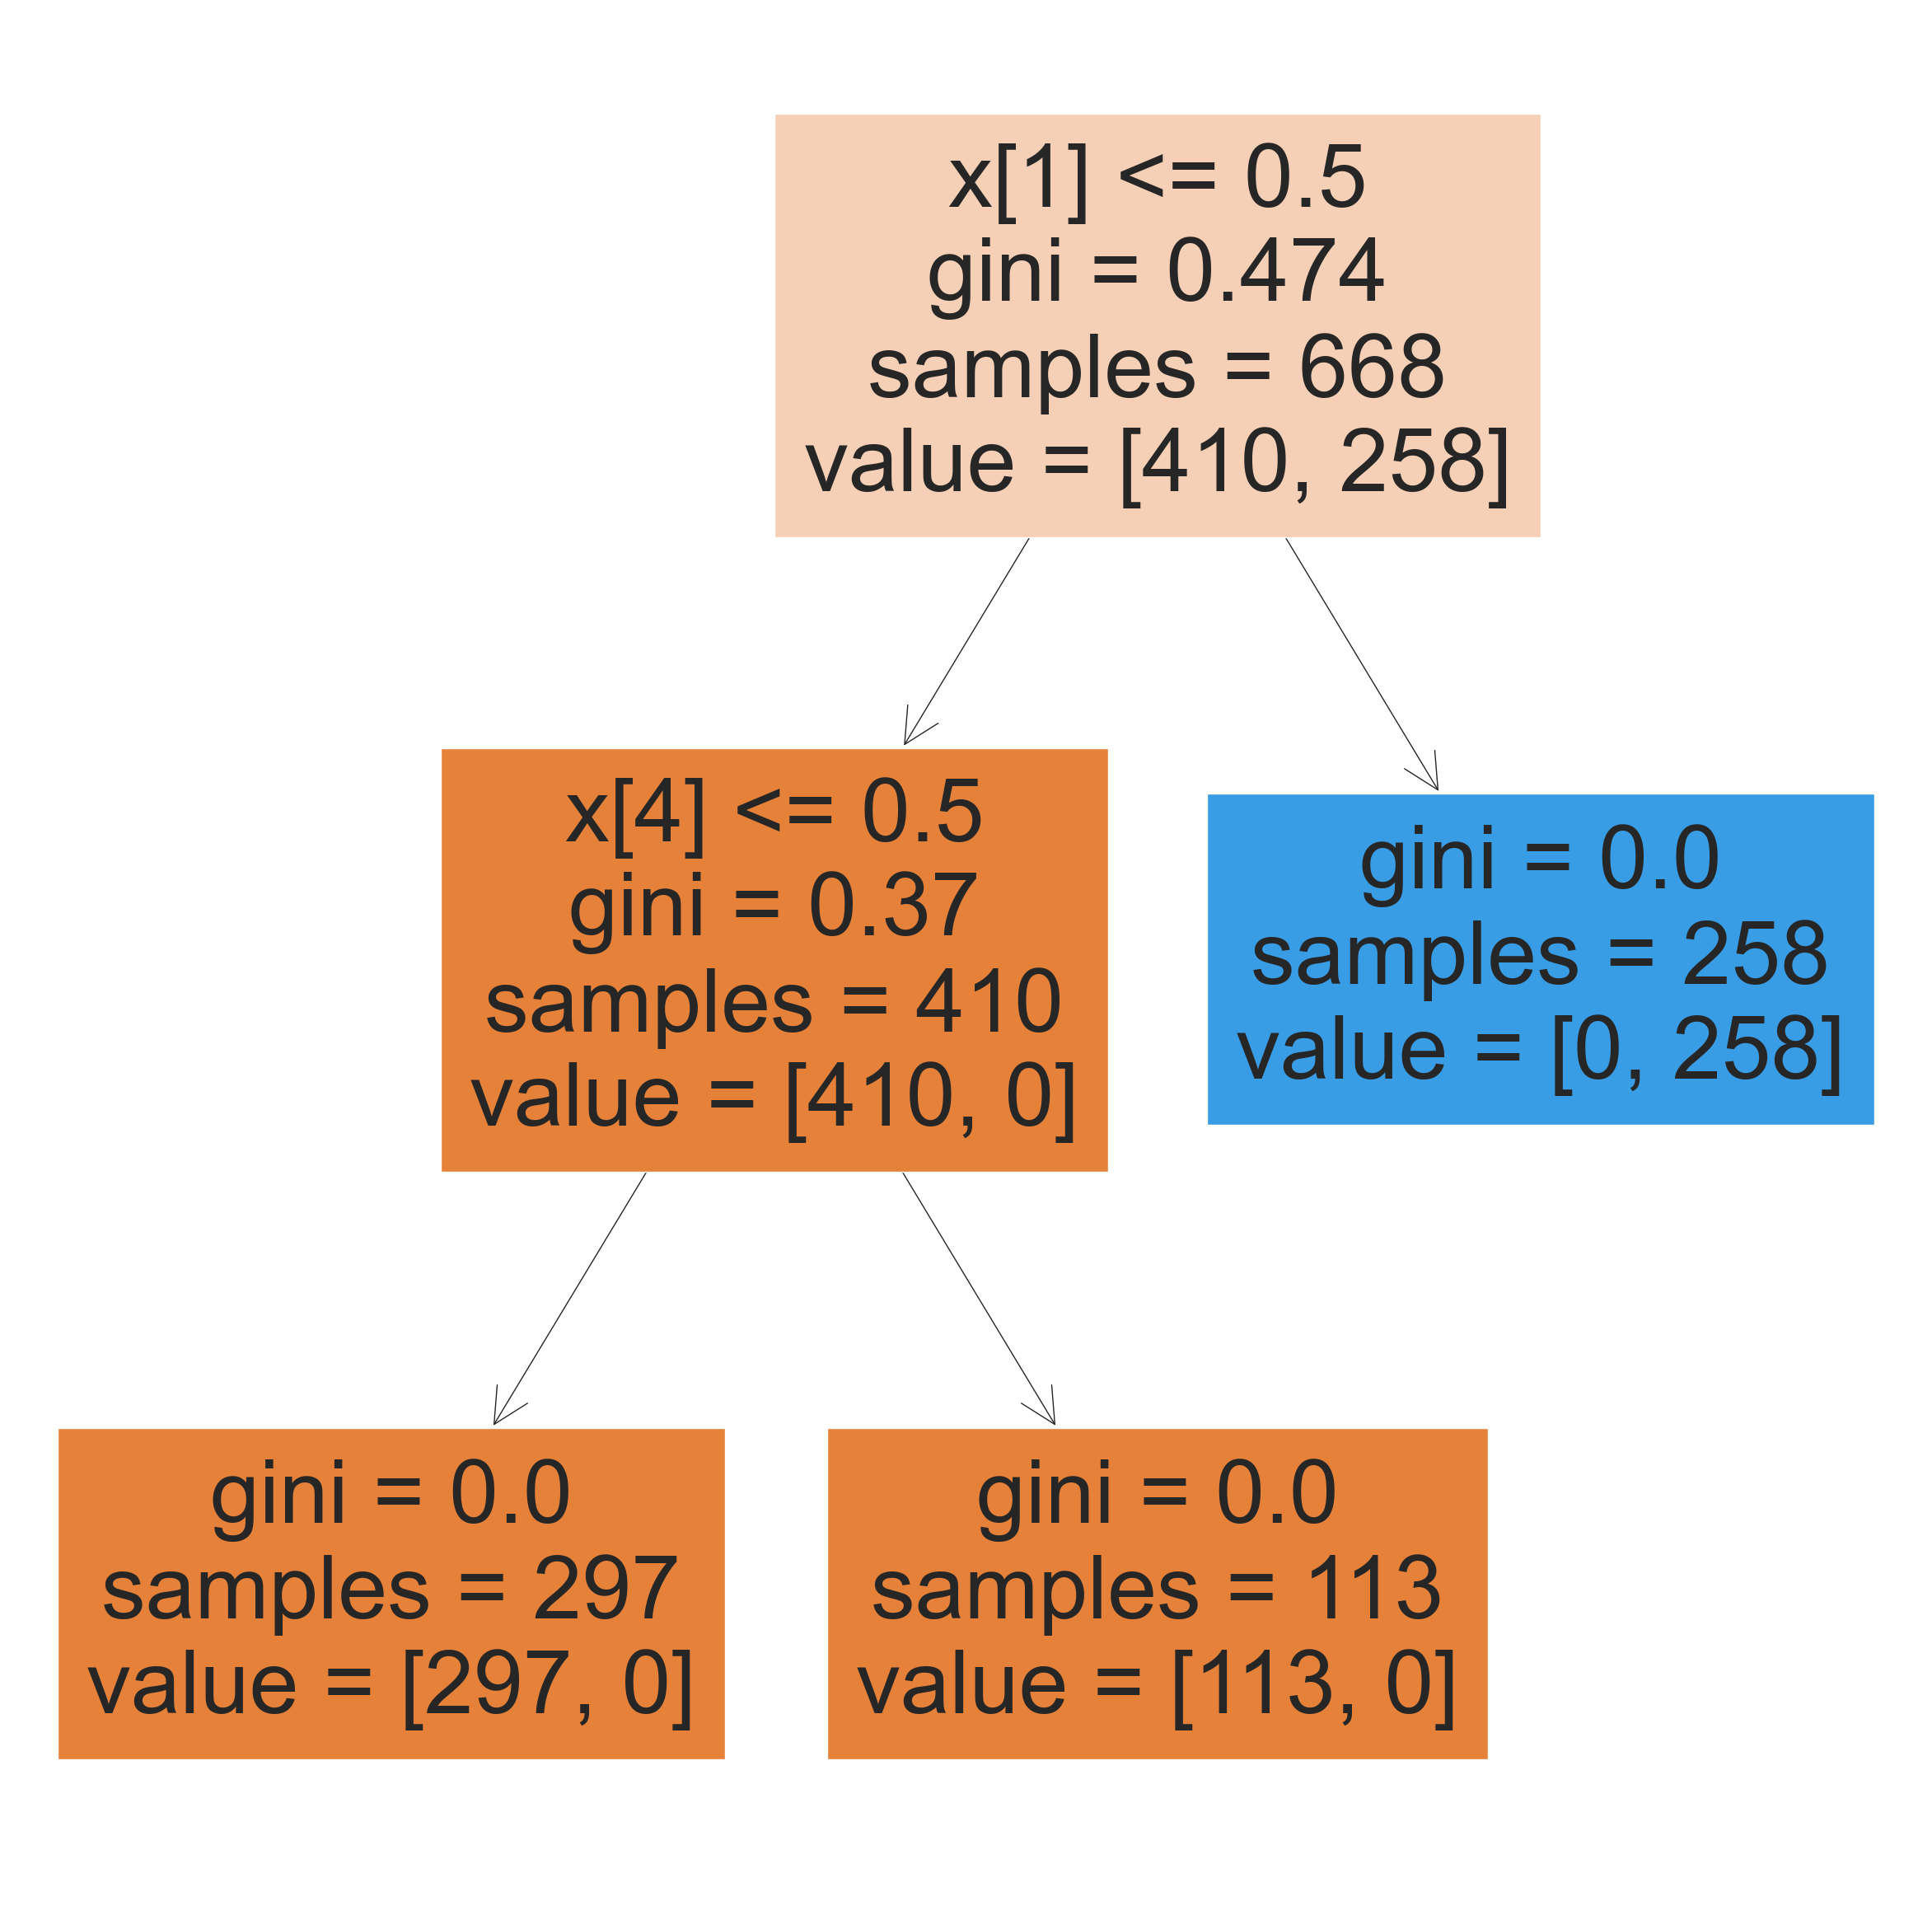

In [197]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

plt.figure(figsize=(30, 30)) # Resize figure
plot_tree(classifier, filled=True)
plt.show()

['Age', 'Fare', 'Sibsp']


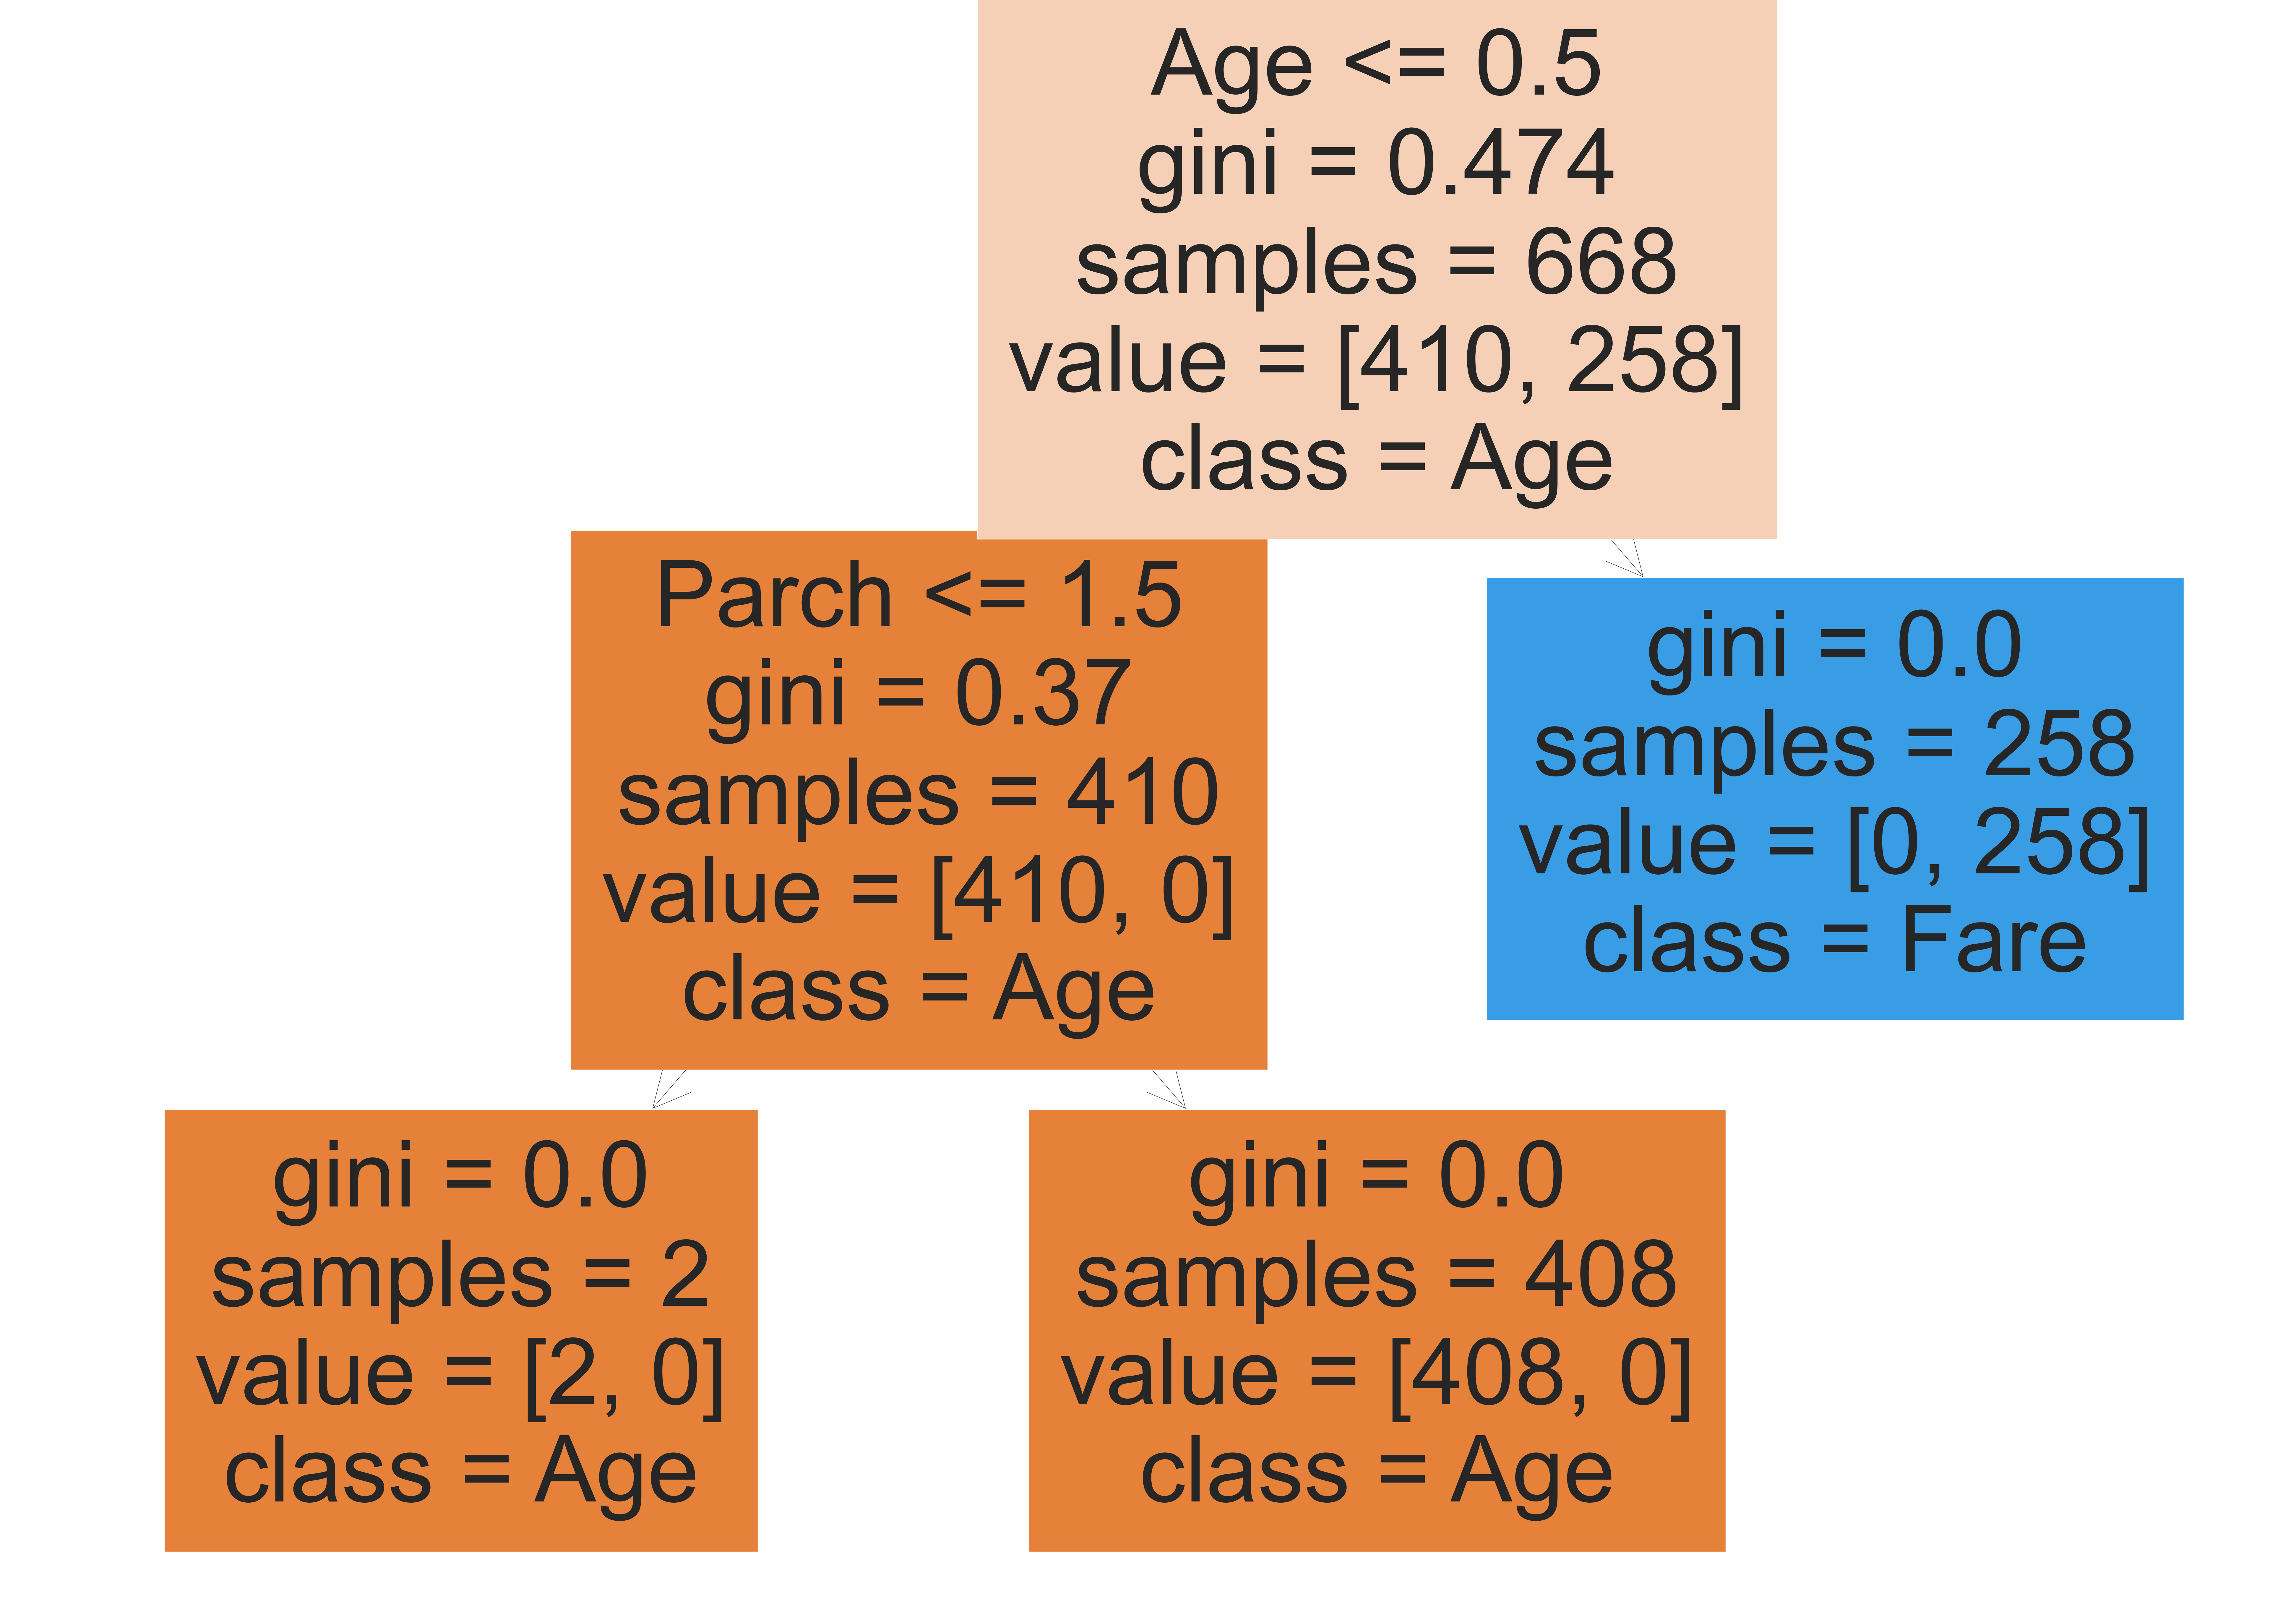

In [268]:
plt.figure(figsize=(100, 70))
class_list = ['Age','Fare','Sibsp']
plot_tree(clf2, filled=True,class_names=class_list,feature_names = feature_list) #****
print(class_list)
# print(class_names_list)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [ ]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
# scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
# scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
# scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
# print('K-fold cross-validation results:')
# print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
# print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
# print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(0.4, 0.5, 'x[3] <= 1.5\ngini = 0.37\nsamples = 410\nvalue = [410, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 408\nvalue = [408, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 258\nvalue = [0, 258]')]

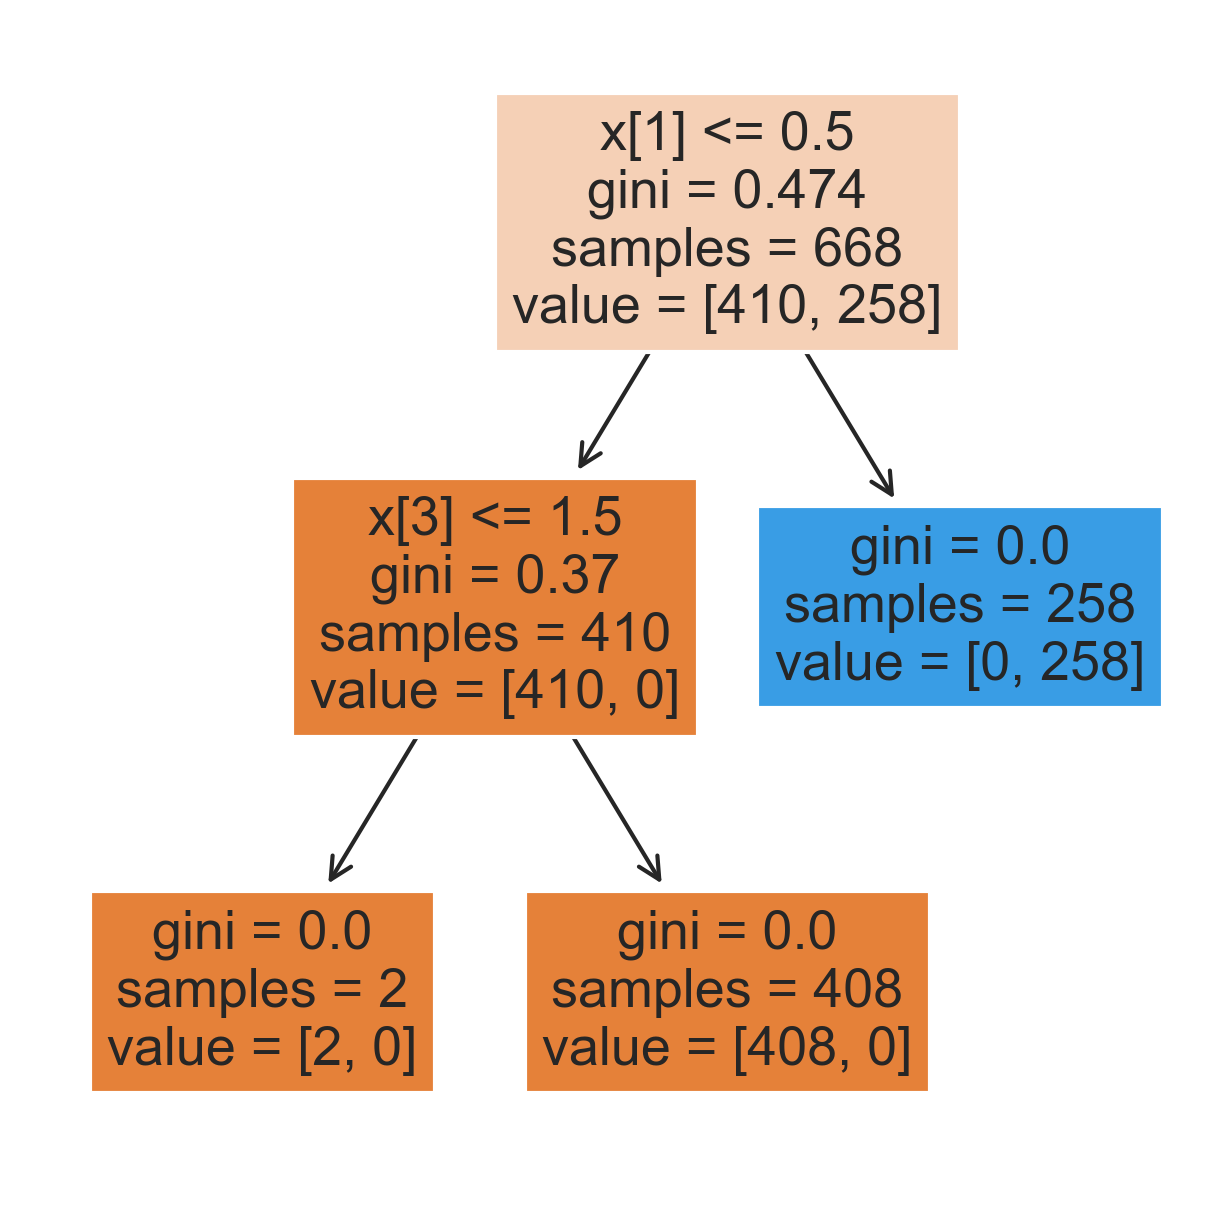

In [175]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf2, filled=True)

In [233]:
from sklearn.datasets import load_iris
from sklearn import tree
from six import StringIO
import pydot 

clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

# graph[0].write_pdf("train_df")

In [265]:
test_data = train_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)
testing.drop('index',axis = 1, inplace = True)
final_test = testing
final_test.head()
print(final_test)

      Survived    Age      Fare  TravelAlone  Pclass_1  Pclass_2  Pclass_3  \
0          0.0  22.00    7.2500            0     False     False      True   
1          1.0  38.00   71.2833            0      True     False     False   
2          1.0  26.00    7.9250            1     False     False      True   
3          1.0  35.00   53.1000            0      True     False     False   
4          0.0  35.00    8.0500            1     False     False      True   
5          0.0  28.00    8.4583            1     False     False      True   
6          0.0  54.00   51.8625            1      True     False     False   
7          0.0   2.00   21.0750            0     False     False      True   
8          1.0  27.00   11.1333            0     False     False      True   
9          1.0  14.00   30.0708            0     False      True     False   
10         1.0   4.00   16.7000            0     False     False      True   
11         1.0  58.00   26.5500            1      True     False

In [266]:
clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
